In [83]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 32})
# sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 15, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())




'2018-01-15 10:53:15.081062'

In [84]:
RCP8_IPSL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/192ts_T_only_RCP8_IPSL.mat')
RCP4_IPSL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/192ts_T_only_RCP4_IPSL.mat')
RCP8_GFDL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/192ts_T_only_RCP8_GFDL.mat')

In [85]:
RCP4_GFDL_plotter = ResultsPlotter(f='../IO/airT_Scenarios/192ts_T_only_RCP4_GFDL.mat')
hist_20y_plotter = ResultsPlotter(f='../IO/airT_Scenarios/48ts_T_only_full_scen_base_historical_20y.mat')

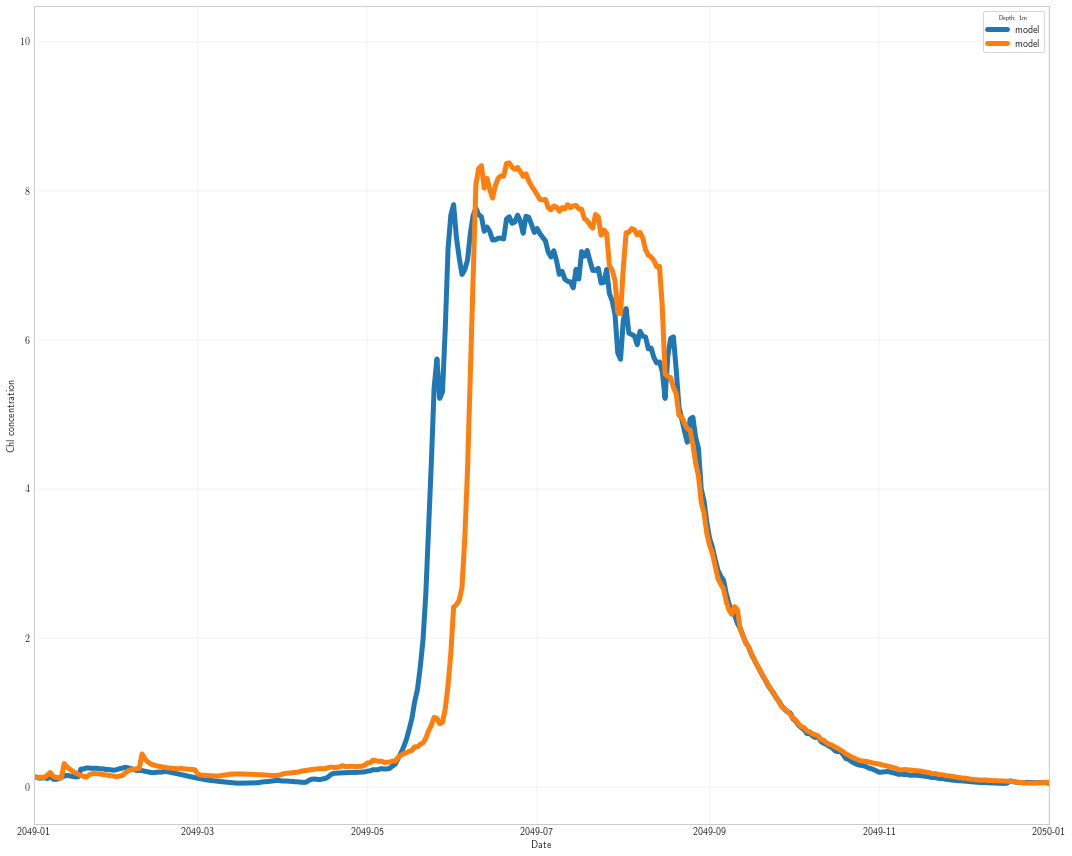

In [86]:
start_date = '2049-01-01'
end_date = '2050-01-01'
# ax = RCP8_IPSL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)
# ax = RCP4_IPSL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)
ax = RCP8_GFDL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)
ax = RCP4_GFDL_plotter.plot_fit_wc(['Chl'], depth=1, dstart=start_date, dend=end_date, factor=1)



In [87]:
import scenarios_plots as sp

In [88]:
%reload_ext scenarios_plots

In [89]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


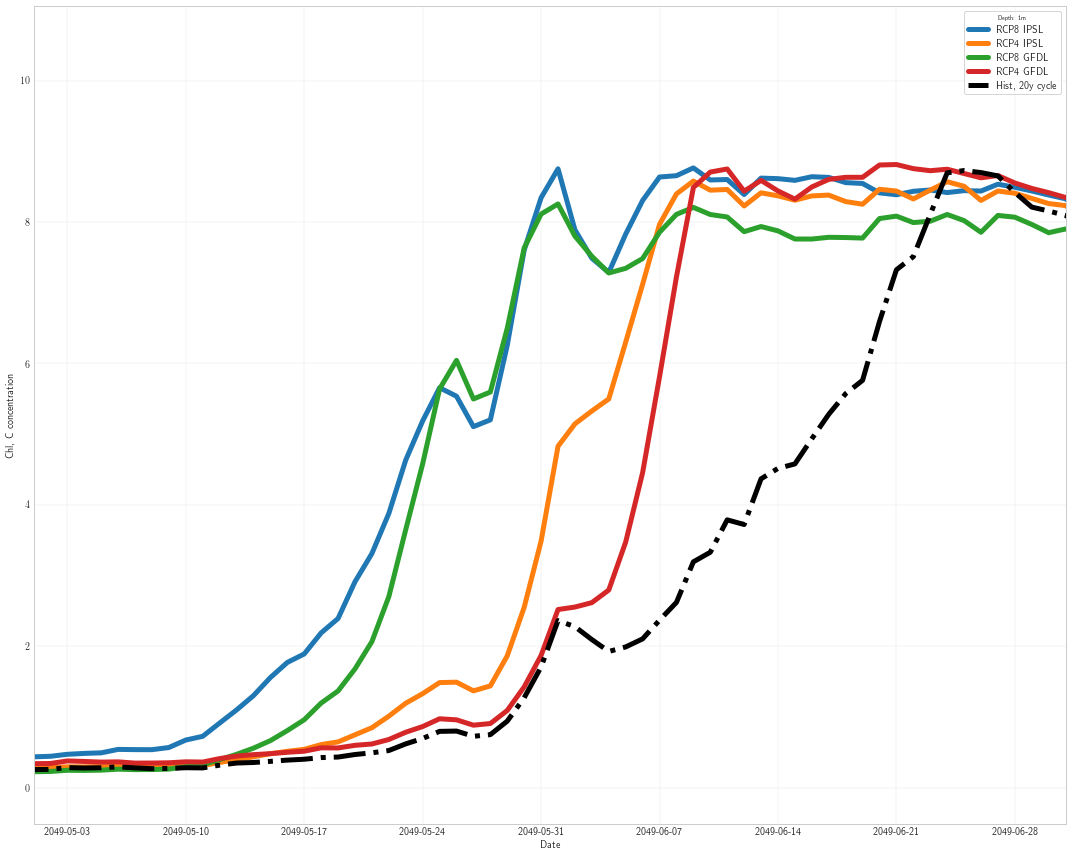

In [90]:
start_date = '2049-05-01'
end_date = '2049-07-01'
lw=5
ax = sp.plot_wc(RCP8_IPSL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP8 IPSL', lw=lw)
ax = sp.plot_wc(RCP4_IPSL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP4 IPSL', lw=lw)
ax = sp.plot_wc(RCP8_GFDL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP8 GFDL', lw=lw)
ax = sp.plot_wc(RCP4_GFDL_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='RCP4 GFDL', lw=lw)
ax = sp.plot_wc(hist_20y_plotter, ['Chl', 'C'], depth=1, dstart=start_date, dend=end_date, factor=1, label='Hist, 20y cycle', c='k', linestyle='-.', lw=5)




In [91]:
results = RCP8_IPSL_plotter.env_getter('water')
d = 4
e = 'Chl'

ice_thickness = results['His'][0, 0][0, :]

inx = np.where(results['z'][0, 0] == d)[0][0]
results['concentrations'][0, 0][e][0, 0][inx, :]


array([0.01024454, 0.01345645, 0.01291327, ..., 0.09555045, 0.09329683,
       0.09554041])

In [92]:
from scenarios_plots import get_data_wc

In [93]:
RCP8_IPSL_res = pd.DataFrame()

In [94]:
days, Phy = get_data_wc(RCP8_IPSL_plotter, ['Chl', 'C'], 4)

In [95]:
len(days)

20454

In [96]:
len(Phy)

20454

In [97]:
names_scen = ['RCP8 IPSL 2005-2050', 'RCP4 IPSL 2005-2050', 'RCP8 GFDL 2005-2050', 'RCP4 GFDL 2005-2050', 'Historical 1985-2005']

In [98]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Phy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Phy[n] = get_data_wc(res, ['Chl', 'C'], 4)[1]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear

In [99]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Oxy = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Oxy[n] = get_data_wc(res, ['O2'], 35)[1]
    
Oxy['Year'] = Oxy.Date.dt.year
Oxy['Month'] = Oxy.Date.dt.month
Oxy['Day'] = Oxy.Date.dt.day
Oxy['DOY'] = Oxy.Date.dt.dayofyear

In [100]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tsed = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Tsed[n] = res.env_getter('water')['T'][0][0][76, :]
    
Tsed['Year'] = Tsed.Date.dt.year
Tsed['Month'] = Tsed.Date.dt.month
Tsed['Day'] = Tsed.Date.dt.day
Tsed['DOY'] = Tsed.Date.dt.dayofyear

In [101]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Ice[n] = res.env_getter('water')['His'][0, 0][0, :]
    
Ice['Year'] = Ice.Date.dt.year
Ice['Month'] = Ice.Date.dt.month
Ice['Day'] = Ice.Date.dt.day
Ice['DOY'] = Ice.Date.dt.dayofyear

In [102]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Tair = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Tair[n] = res.env_getter('water')['Wt'][0, 0][:, 2]
    
Tair['Year'] = Tair.Date.dt.year
Tair['Month'] = Tair.Date.dt.month
Tair['Day'] = Tair.Date.dt.day
Tair['DOY'] = Tair.Date.dt.dayofyear

In [103]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Ice_bool = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Ice_bool[n] = res.env_getter('water')['His'][0, 0][6, :]
    
Ice_bool['Year'] = Ice_bool.Date.dt.year
Ice_bool['Month'] = Ice_bool.Date.dt.month
Ice_bool['Day'] = Ice_bool.Date.dt.day
Ice_bool['DOY'] = Ice_bool.Date.dt.dayofyear

In [104]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    P_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['PO4'][0][0][0] + res.env_getter('sediment')['Bioirrigation_fx_zt'][0, 0]['PO4'][0][0][0]
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear

In [105]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
Fe2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    Fe2_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['Fe2'][0][0][0] + res.env_getter('sediment')['Bioirrigation_fx_zt'][0, 0]['Fe2'][0][0][0]
    
Fe2_fx['Year'] = Fe2_fx.Date.dt.year
Fe2_fx['Month'] = Fe2_fx.Date.dt.month
Fe2_fx['Day'] = Fe2_fx.Date.dt.day
Fe2_fx['DOY'] = Fe2_fx.Date.dt.dayofyear

In [106]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(len(days)-1), freq='D')
O2_fx = pd.DataFrame({'Date': ds})

for res, n in zip([RCP8_IPSL_plotter, RCP4_IPSL_plotter, RCP8_GFDL_plotter, RCP4_GFDL_plotter, hist_20y_plotter],names_scen):
    O2_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['O2'][0][0][0] + res.env_getter('sediment')['Bioirrigation_fx_zt'][0, 0]['O2'][0][0][0]
    
O2_fx['Year'] = O2_fx.Date.dt.year
O2_fx['Month'] = O2_fx.Date.dt.month
O2_fx['Day'] = O2_fx.Date.dt.day
O2_fx['DOY'] = O2_fx.Date.dt.dayofyear

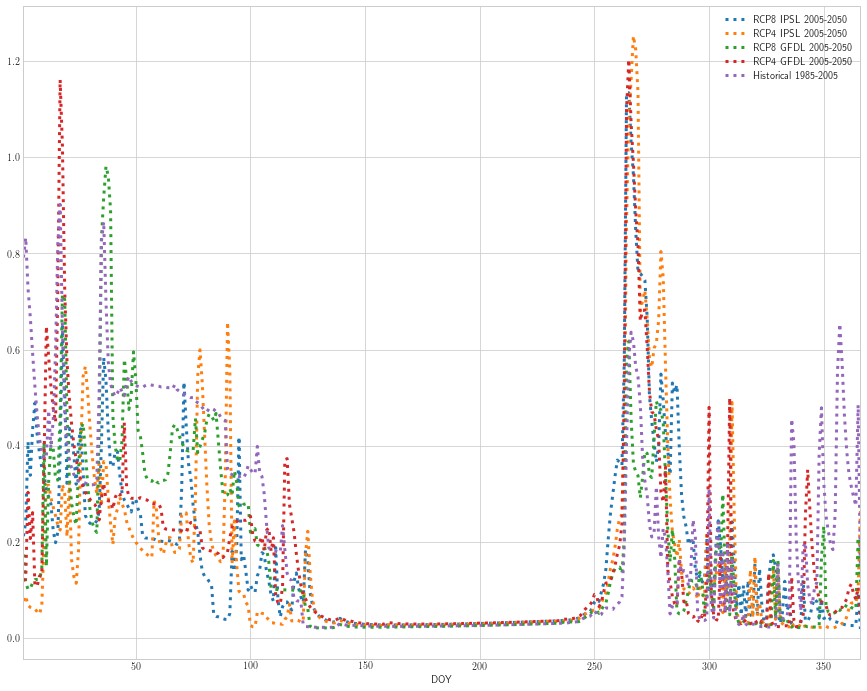

In [107]:
Fe2_fx[-365*10:].groupby(['DOY']).mean()[names_scen].plot(linestyle=':', lw=3)

Text(0.5,1,'2040-2050 Mean Oxy')

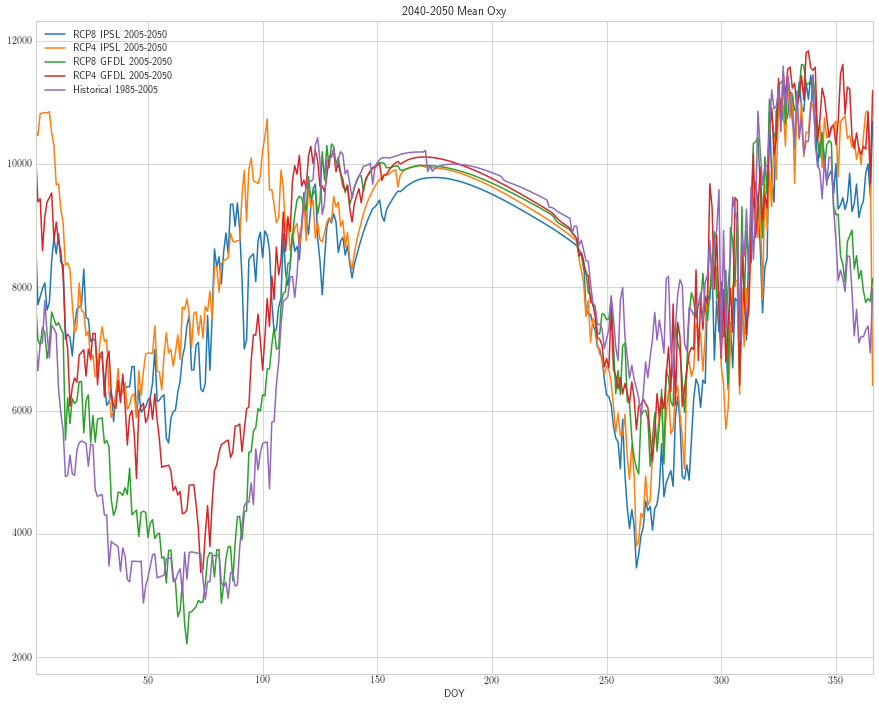

In [108]:
Oxy[-365*30:].groupby(['DOY']).mean()[names_scen].plot()
# plt.xlim(120,200)
plt.title('2040-2050 Mean Oxy')

(0, 365)

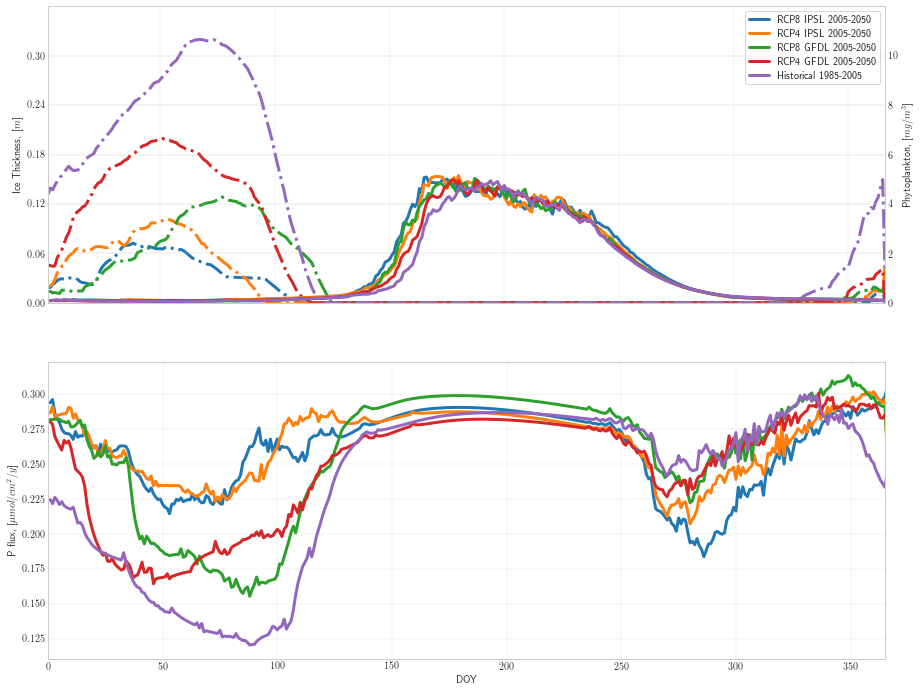

In [109]:
ax0 = plt.subplot(211)
ax1 = ax0.twinx()

ax1.set_ylim(0,12)
ax0.set_ylim(0,0.36)


Phy[-365*10:].groupby(['DOY']).mean()[names_scen].plot(ax=ax1, lw=3)
Ice[-365*10:].groupby(['DOY']).mean()[names_scen].plot(linestyle='-.', ax=ax0, lw=3)

ax1.set_yticks(np.arange(0, 12, 1.0*2))
ax0.set_yticks(np.arange(0, 0.36, 0.03*2))
ax0.set_ylabel('Ice Thickness, [$m$]')
ax1.set_ylabel('Phytoplankton, [$mg/m^3$]')

ax0.set_xlabel('Day of the year')
ax1.legend(frameon=1)

ax2 = plt.subplot(212)
P_fx[-365*10:].groupby(['DOY']).mean()[names_scen].plot(linestyle='-', lw=3, ax=ax2)
ax2.legend_.remove()
ax2.set_ylabel('P flux, [$\mu mol/cm^2/y$]')
# ax2.set_ylim(0.6, 0.9)

ax0.grid(linestyle='-', linewidth=0.2)
ax1.grid(linestyle='-', linewidth=0.2)
ax2.grid(linestyle='-', linewidth=0.2)

plt.xlim(0,365)
# plt.title('2040-2050 Mean Phy')

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/ploting.py:529: RuntimeWarning: invalid value encountered in greater
  -TCz * (TCz > 1),


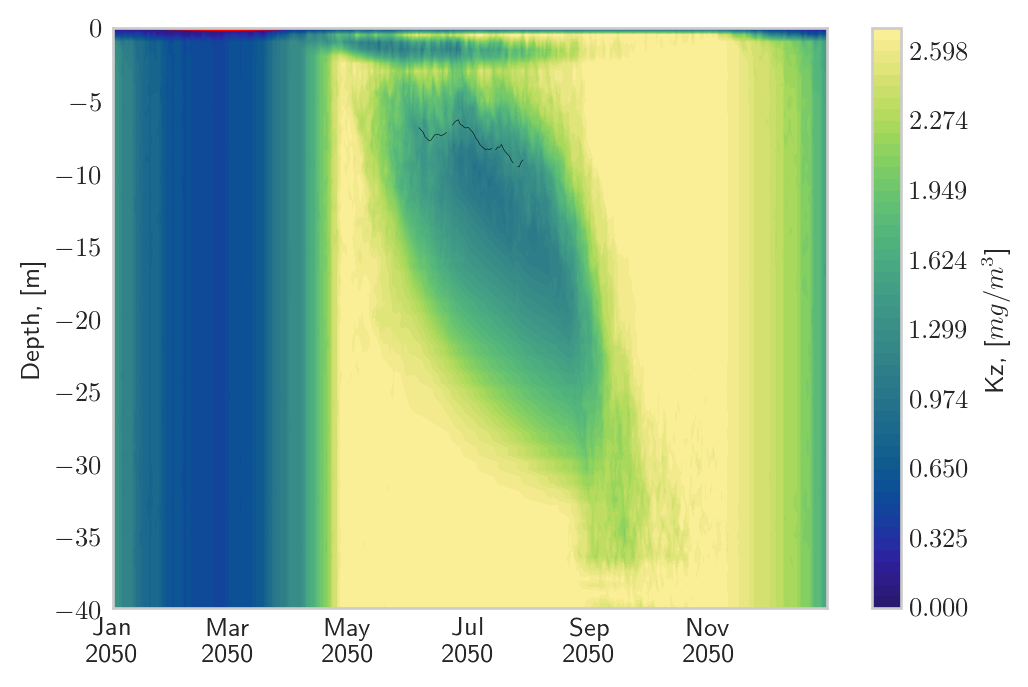

In [110]:
Kz_rcp4_gfdl = RCP4_GFDL_plotter.contour_plot_mean_several_years('water', ['K'],  years=45,cmap=cmocean.cm.haline)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/ploting.py:529: RuntimeWarning: invalid value encountered in greater
  -TCz * (TCz > 1),


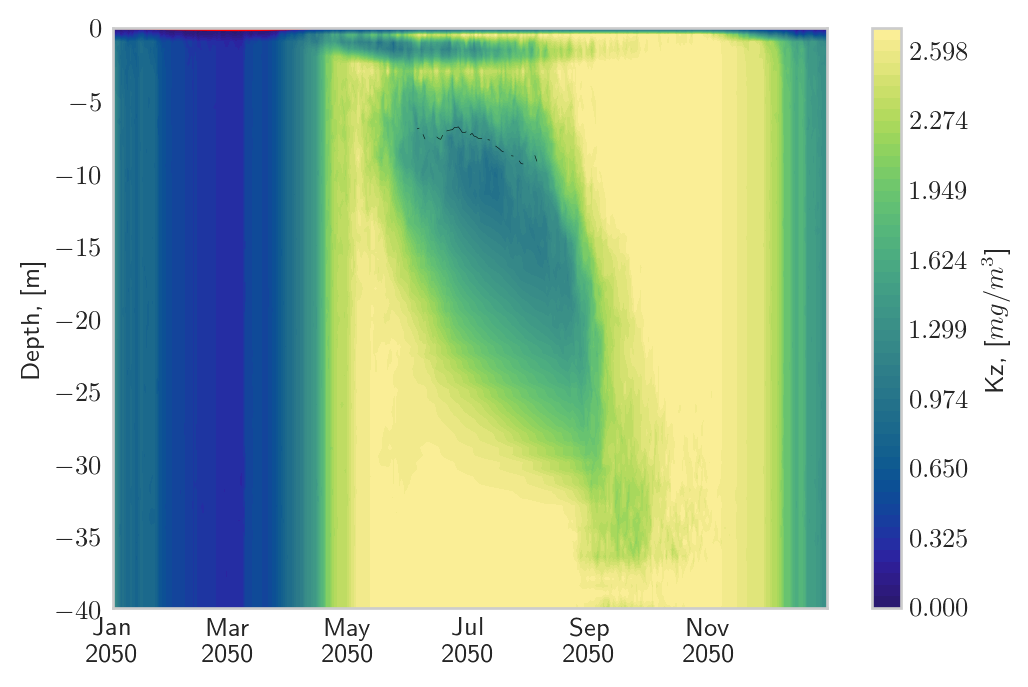

In [111]:
Kz_rcp8_gfdl = RCP8_GFDL_plotter.contour_plot_mean_several_years('water', ['K'],  years=45,cmap=cmocean.cm.haline)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/ploting.py:529: RuntimeWarning: invalid value encountered in greater
  -TCz * (TCz > 1),


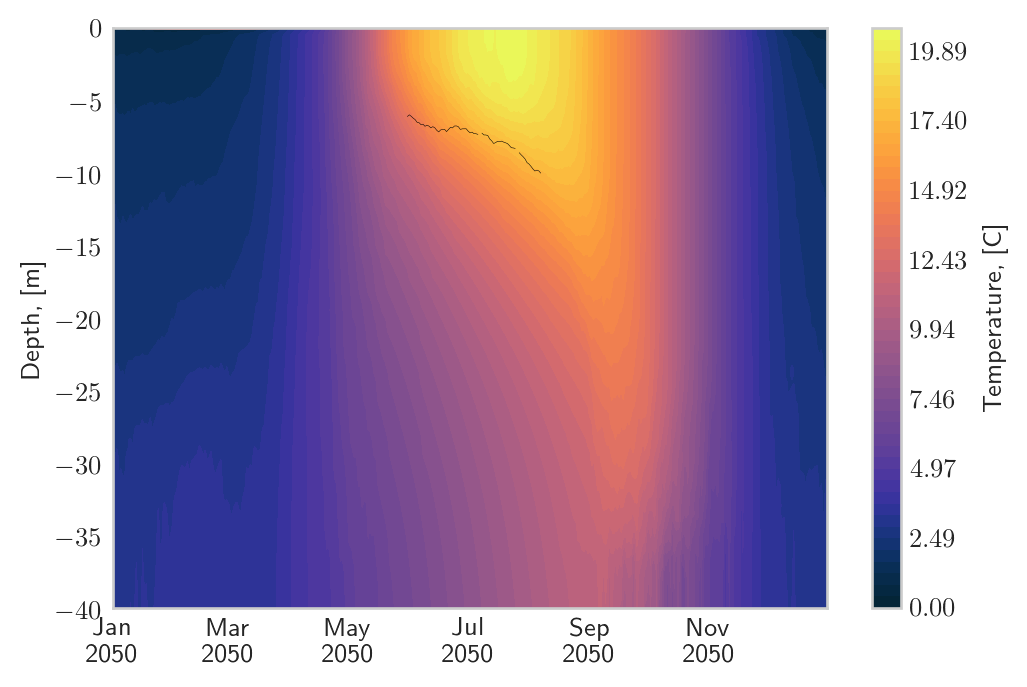

In [112]:
T_rcp8_ipsl = RCP8_IPSL_plotter.contour_plot_mean_several_years('water', ['T'],  years=45,cmap=cmocean.cm.thermal)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/ploting.py:529: RuntimeWarning: invalid value encountered in greater
  -TCz * (TCz > 1),


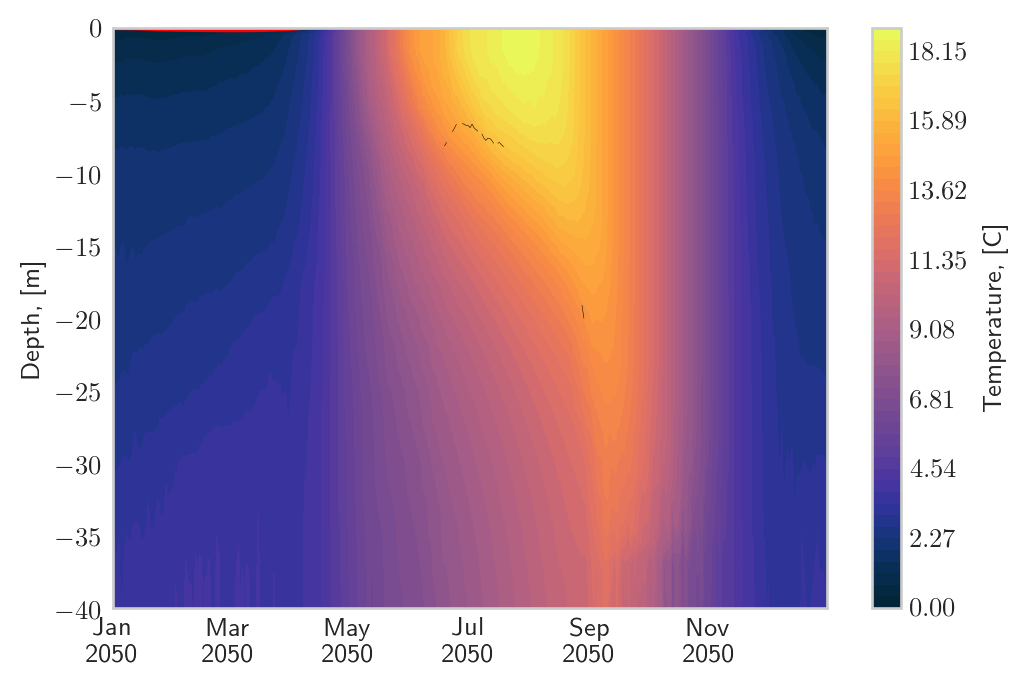

In [113]:
T_hist = hist_20y_plotter.contour_plot_mean_several_years('water', ['T'],  years=45,cmap=cmocean.cm.thermal)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/ploting.py:529: RuntimeWarning: invalid value encountered in greater
  -TCz * (TCz > 1),


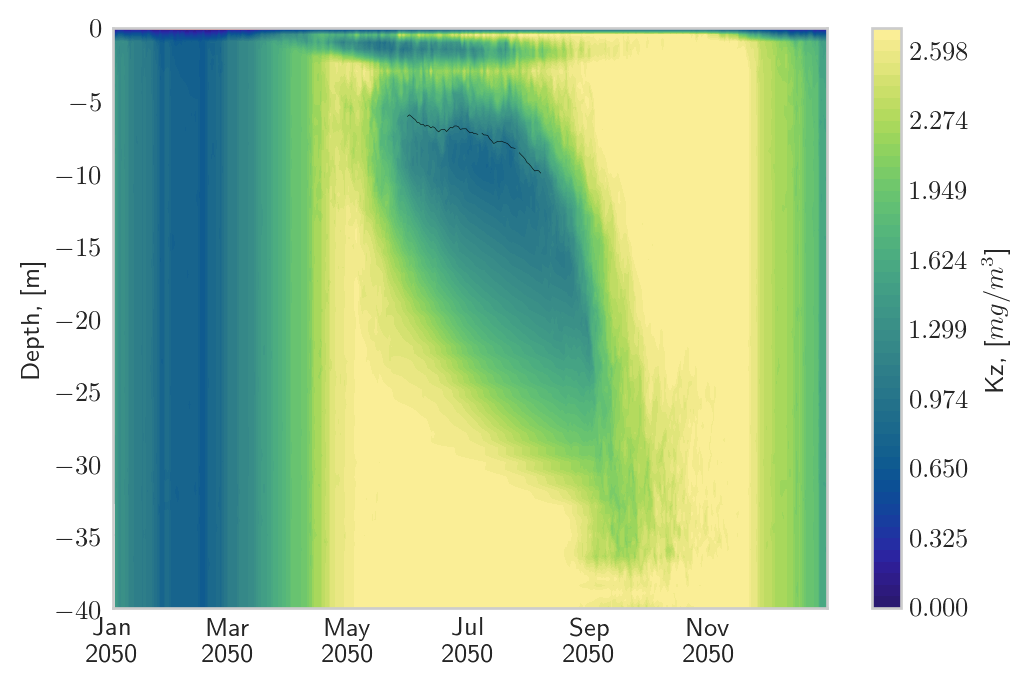

In [115]:
Kz_rcp8_ipsl = RCP8_IPSL_plotter.contour_plot_mean_several_years('water', ['K'],  years=45,cmap=cmocean.cm.haline)

/Users/imarkelo/git/MyLake_v2_Vansjo/Postproc_code/ploting.py:529: RuntimeWarning: invalid value encountered in greater
  -TCz * (TCz > 1),


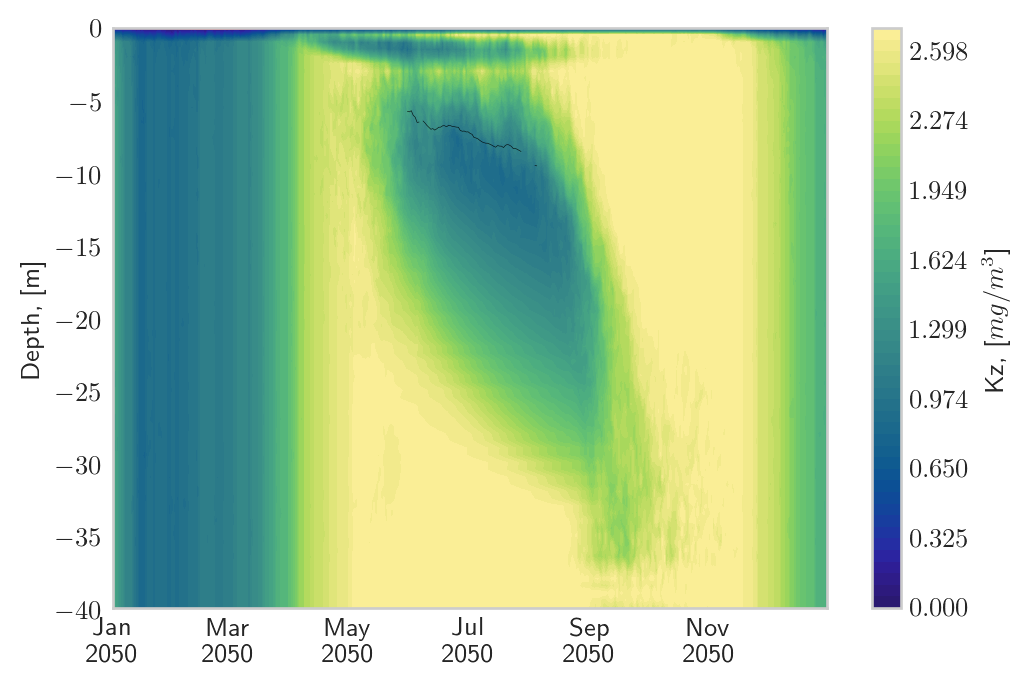

In [116]:
Kz_rcp4_ipsl = RCP4_IPSL_plotter.contour_plot_mean_several_years('water', ['K'],  years=45,cmap=cmocean.cm.haline)

In [117]:
rho_hist = hist_20y_plotter.contour_plot_mean_several_years('water', ['rho'],  years=45,cmap=cmocean.cm.haline)

ValueError: no field of name rho

In [ ]:
drhodz_hist = np.diff(rho_hist, axis=0)/0.5
results = hist_20y_plotter.env_getter('water')
plt.figure(figsize=(6, 4), dpi=192)
start = int(-365)
end = int(-1)

treshhold = 100
z = drhodz_hist
z[z>treshhold] = treshhold
z[z<1e-6] =1e-6
z = -np.log10(z)

vmin = 0# -np.max(np.abs([z.min(), z.max()]))
vmax = np.max(np.abs([z.min(), z.max()]))

v = np.linspace(vmin, vmax, 21, endpoint=True)

X, Y = np.meshgrid(results['days'][0, 0][0][start:end] - 365,
                   -results['z'][0, 0][0:-2])



cs = plt.contourf(X,Y,z,v, cmap=cmocean.cm.deep,vmin=0,vmax=vmax)
plt.ylabel('Depth, [cm]')
plt.ylim(Y.min(), 0)

plt.ylabel('Depth, [m]')

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
cbar = plt.colorbar(cs)




In [ ]:
vmin

In [ ]:
Kz_hist = hist_20y_plotter.contour_plot_mean_several_years('water', ['K'],  years=45,cmap=cmocean.cm.haline)

In [ ]:
Kz_rcp8_ipsl = RCP8_IPSL_plotter.contour_plot_mean_several_years('water', ['K'],  years=45,cmap=cmocean.cm.haline)

In [ ]:
hist_20y_plotter.custom_contour_plot((Kz_rcp8_ipsl - Kz_hist), vmin=-1.5, vmax=1.5,cmap=cmocean.cm.balance)

In [ ]:
dTdz_hist = np.diff(T_hist, axis=0)/0.5
dTdz_rsp8_ipsl = np.diff(T_rcp8_ipsl, axis=0)/0.5
dT2dz2_hist = np.diff(dTdz_hist, axis=0)/0.5
dT2dz2_rsp8_ipsl = np.diff(dTdz_rsp8_ipsl, axis=0)/0.5

In [ ]:
results = hist_20y_plotter.env_getter('water')
plt.figure(figsize=(6, 4), dpi=192)
start = int(-365)
end = int(-1)
vmin = -1#-np.max(np.abs([z.min(), z.max()]))
vmax = 1#np.max(np.abs([z.min(), z.max()]))
v = np.linspace(vmin, vmax, 51, endpoint=True)
X, Y = np.meshgrid(results['days'][0, 0][0][start:end] - 365,
                   -results['z'][0, 0][0:-3])
cs = plt.contourf(X,Y,abs(dT2dz2_rsp8_ipsl),v, cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
plt.ylabel('Depth, [cm]')
plt.ylim(Y.min(), 0)

plt.ylabel('Depth, [m]')

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
cbar = plt.colorbar(cs)


In [ ]:
results = hist_20y_plotter.env_getter('water')
plt.figure(figsize=(6, 4), dpi=192)
start = int(-365)
end = int(-1)
treshhold = 2
vmin = -treshhold#-np.max(np.abs([z.min(), z.max()]))
vmax = treshhold#np.max(np.abs([z.min(), z.max()]))
v = np.linspace(0, vmax, 51, endpoint=True)
X, Y = np.meshgrid(results['days'][0, 0][0][start:end] - 365,
                   -results['z'][0, 0][0:-2])

logdTdz = -np.log10(np.abs(dTdz))
logdTdz[logdTdz>treshhold] = treshhold
cs = plt.contourf(X,Y,logdTdz,v, cmap=cmocean.cm.deep,vmin=0,vmax=vmax)
plt.ylabel('Depth, [cm]')
plt.ylim(Y.min(), 0)

plt.ylabel('Depth, [m]')

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
cbar = plt.colorbar(cs)



In [ ]:
results = hist_20y_plotter.env_getter('water')
plt.figure(figsize=(6, 4), dpi=192)
start = int(-365)
end = int(-1)
treshhold = 2
vmin = -treshhold#-np.max(np.abs([z.min(), z.max()]))
vmax = treshhold#np.max(np.abs([z.min(), z.max()]))
v = np.linspace(0, vmax, 51, endpoint=True)
X, Y = np.meshgrid(results['days'][0, 0][0][start:end] - 365,
                   -results['z'][0, 0][0:-2])

logdTdz = -np.log10(np.abs(dTdz_rsp8_ipsl))
logdTdz[logdTdz>treshhold] = treshhold
cs = plt.contourf(X,Y,logdTdz,v, cmap=cmocean.cm.deep,vmin=0,vmax=vmax)
plt.ylabel('Depth, [cm]')
plt.ylim(Y.min(), 0)

plt.ylabel('Depth, [m]')

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
cbar = plt.colorbar(cs)




In [ ]:
results = hist_20y_plotter.env_getter('water')
plt.figure(figsize=(6, 4), dpi=192)
start = int(-365)
end = int(-1)
treshhold = 2
vmin = -treshhold#-np.max(np.abs([z.min(), z.max()]))
vmax = treshhold#np.max(np.abs([z.min(), z.max()]))
v = np.linspace(vmin, vmax, 51, endpoint=True)
X, Y = np.meshgrid(results['days'][0, 0][0][start:end] - 365,
                   -results['z'][0, 0][0:-2])

logdTdz_rsp8_ipsl = -np.log10(np.abs(dTdz_rsp8_ipsl))
logdTdz_rsp8_ipsl[logdTdz_rsp8_ipsl>treshhold] = treshhold

logdTdz_hist = -np.log10(np.abs(dTdz_hist))
logdTdz_hist[logdTdz_hist>treshhold] = treshhold



cs = plt.contourf(X,Y,logdTdz_rsp8_ipsl-logdTdz_hist,v, cmap=cmocean.cm.balance,vmin=vmin,vmax=vmax)
plt.ylabel('Depth, [cm]')
plt.ylim(Y.min(), 0)

plt.ylabel('Depth, [m]')

ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
cbar = plt.colorbar(cs)





In [ ]:
hist_20y_plotter.custom_contour_plot(Kz_rcp8_gfdl - Kz_hist, cmap=cmocean.cm.balance)

In [ ]:
import numpy as np

from bokeh.layouts import gridplot
from bokeh.models import LinearAxis, Range1d
from bokeh import palettes

from bokeh.plotting import figure, show, output_notebook

output_notebook()

last_years = 30

ice_grouped = Ice[-365*last_years:].groupby(['DOY']).mean()[names_scen]
ice_grouped.reset_index(inplace=True)
phy_grouped = Phy[-365*last_years:].groupby(['DOY']).mean()[names_scen]
phy_grouped.reset_index(inplace=True)
pfx_grouped = P_fx[-365*last_years:].groupby(['DOY']).mean()[names_scen]
pfx_grouped.reset_index(inplace=True)
fe2fx_grouped = Fe2_fx[-365*last_years:].groupby(['DOY']).mean()[names_scen]
fe2fx_grouped.reset_index(inplace=True)
o2fx_grouped = O2_fx[-365*last_years:].groupby(['DOY']).mean()[names_scen]
o2fx_grouped.reset_index(inplace=True)

TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"

p1 = figure(tools=TOOLS, y_range=(0, 0.36), x_range=(0, 364))

# p1.circle("DOY", ice_grouped, line_color="red", line_width=2)
for i, scen in enumerate(names_scen):
    p1.line(ice_grouped.index, ice_grouped[scen], line_color=palettes.all_palettes['Category10'][7][i], line_width=3)

p1.yaxis.axis_label = "Ice thicknes, m"

    
p1.extra_y_ranges = {"chl": Range1d(start=0, end=10)}
p1.add_layout(LinearAxis(y_range_name="chl", axis_label="Phytoplankton, [ug/L]"), 'right')

for i, scen in enumerate(names_scen):
    p1.line(phy_grouped.index, phy_grouped[scen], line_color=palettes.all_palettes['Category10'][7][i], line_width=3, y_range_name="chl", legend=scen, line_dash='dashed')

p2 = figure(tools=TOOLS, x_range=(0, 364))

for i, scen in enumerate(names_scen):
    p2.line(pfx_grouped.index, pfx_grouped[scen], line_color=palettes.all_palettes['Category10'][7][i], line_width=3)

p2.yaxis.axis_label = 'DIP flux from sediment, [umol/sq.cm/year]'

p3 = figure(tools=TOOLS, x_range=(0, 364))

for i, scen in enumerate(names_scen):
    p3.line(fe2fx_grouped.index, fe2fx_grouped[scen], line_color=palettes.all_palettes['Category10'][7][i], line_width=3)

p3.yaxis.axis_label = 'Fe(II) flux from sediment, [umol/sq.cm/year]'

p4 = figure(tools=TOOLS, x_range=(0, 364))

for i, scen in enumerate(names_scen):
    p4.line(o2fx_grouped.index, -o2fx_grouped[scen], line_color=palettes.all_palettes['Category10'][7][i], line_width=3)

p4.yaxis.axis_label = 'O2 flux to sediment, [umol/sq.cm/year]'

show(gridplot(p1, p2, p3, p4, ncols=1, nrows=4, plot_width=800, plot_height=300))  # open a browser

In [ ]:
Ice.groupby(['DOY']).mean()[names_scen].idxmin()

In [ ]:
# algae 
Ice.groupby(['DOY']).mean()[names_scen].idxmin().values
phy_int_yearly

In [ ]:
plt.scatter(Ice.groupby(['DOY']).mean()[names_scen].idxmin().values, phy_int_yearly)
plt.ylim(0,3)
plt.xlim(1,364)

In [ ]:
Phy.groupby(['DOY']).mean()[names_scen].idxmax()

In [ ]:
palettes.all_palettes['Paired'][7][0]

In [ ]:
from numpy import trapz

In [ ]:
columns

In [ ]:
p_int_yearly = []
phy_int_yearly = []
ice_int_yearly = []
for y in np.arange(1995, 2051):
    for scen in names_scen:
        p_int_yearly.append(trapz(P_fx[P_fx.Year==y][scen], dx=1./365))
        phy_int_yearly.append(trapz(Phy[Phy.Year==y][scen], dx=1./365))
        ice_int_yearly.append(trapz(Ice_bool[Ice_bool.Year==y][scen], dx=1./365))

In [ ]:
p_int_yearly = []
ice_int_yearly = []
phy_int_yearly = []

for scen in names_scen:
    p_int_yearly.append(trapz(P_fx[-365*45:].groupby(['DOY']).mean()[scen], dx=1./365))
    phy_int_yearly.append(trapz(Phy[Phy.Year==y][scen], dx=1./365))
    ice_int_yearly.append(trapz(Ice_bool[-365*45:].groupby(['DOY']).mean()[scen], dx=1./365))

In [ ]:
P_fx[-365*45:].groupby(['DOY']).mean()[names_scen].plot()

In [ ]:
p_int_yearly

In [ ]:
p_int_yearly

In [ ]:
plt.scatter(Tsed[columns[2]], P_fx[columns[2]])

In [ ]:
plt.plot(ice_thickness)